In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
detector=mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)
def detect_face(frame):
    bounding_boxes=[]
    results = detector.process(frame)
    if results.detections:
        height,width,_=frame.shape
        for detection in results.detections:
            bb=detection.location_data.relative_bounding_box
            x1=max(0,bb.xmin*width)
            y1=max(0,bb.ymin*height)
            x2=min(width,(bb.xmin+bb.width)*width)
            y2=min(height,(bb.ymin+bb.height)*height)
            bbox=np.array([x1,y1,x2,y2])
            bounding_boxes.append(bbox)

    return bounding_boxes

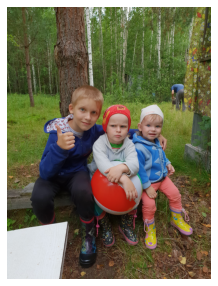

In [3]:
fpath='20180720_174416.jpg'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)

In [4]:
from hsemotion_onnx.facial_emotions import HSEmotionRecognizer
#model_name='enet_b0_8_best_afew'
model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name)

Contempt [-2.888239    3.7595806  -3.4538624  -1.2803918   3.6647608   2.1304247
  0.25463903  0.9497262 ]
Anger [ 5.345763   -1.5420187   1.1584871   2.6180627  -6.394525    0.23759902
  4.0943885  -2.2307038 ]
Fear [-2.0399656  -0.1383848  -0.21266006  2.9558773   1.3176019   0.24725953
  0.42544067  2.4861596 ]


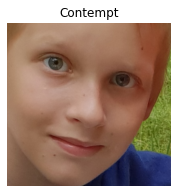

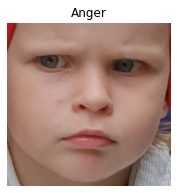

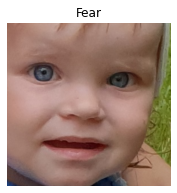

In [5]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

['Contempt', 'Anger', 'Fear'] [[5.88298833e-04 4.53637868e-01 3.34157230e-04 2.93681864e-03
  4.12600368e-01 8.89561400e-02 1.36311520e-02 2.73152385e-02]
 [7.27666497e-01 7.42346398e-04 1.10515095e-02 4.75671478e-02
  5.79682546e-06 4.40032547e-03 2.08193541e-01 3.72833194e-04]
 [3.28465481e-03 2.19955985e-02 2.04210673e-02 4.85463709e-01
  9.43328142e-02 3.23458873e-02 3.86546887e-02 3.03501606e-01]]


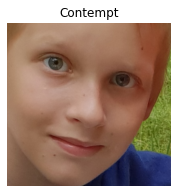

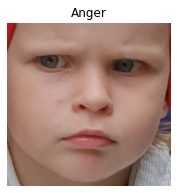

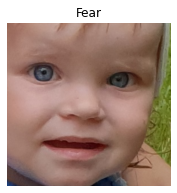

In [6]:
face_img_list=[]
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

enet_b0_8_best_afew
['Contempt', 'Anger', 'Fear'] [[2.2549948e-03 4.1932824e-01 1.2072081e-02 2.5430875e-02 3.7480071e-01
  6.6488869e-02 1.5629586e-02 8.3994716e-02]
 [7.2437185e-01 5.5483766e-03 2.5178831e-02 7.3115155e-02 2.2656651e-04
  1.9855097e-02 1.4895508e-01 2.7490421e-03]
 [3.1355955e-03 9.9947629e-03 1.8900638e-02 5.5034304e-01 9.2157848e-02
  2.1283906e-02 4.5021251e-02 2.5916293e-01]]
enet_b0_8_best_vgaf
['Contempt', 'Anger', 'Fear'] [[5.88298833e-04 4.53637868e-01 3.34157230e-04 2.93681864e-03
  4.12600368e-01 8.89561400e-02 1.36311520e-02 2.73152385e-02]
 [7.27666497e-01 7.42346398e-04 1.10515095e-02 4.75671478e-02
  5.79682546e-06 4.40032547e-03 2.08193541e-01 3.72833194e-04]
 [3.28465481e-03 2.19955985e-02 2.04210673e-02 4.85463709e-01
  9.43328142e-02 3.23458873e-02 3.86546887e-02 3.03501606e-01]]
enet_b2_8
['Contempt', 'Anger', 'Surprise'] [[0.01564715 0.2969756  0.15327385 0.09258805 0.28448877 0.05140156
  0.02266605 0.08295894]
 [0.62116    0.06742901 0.10919079 

<ipython-input-12-fcc77f28556f>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(3, 3))


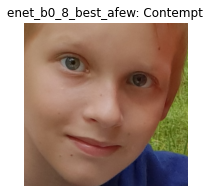

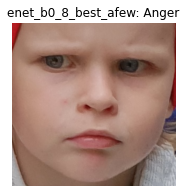

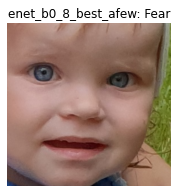

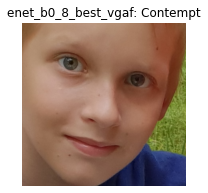

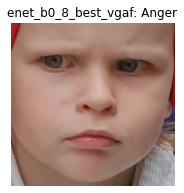

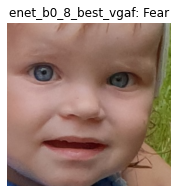

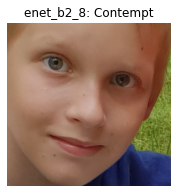

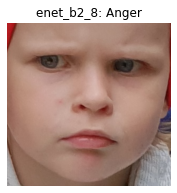

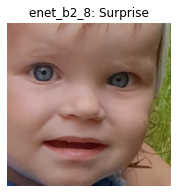

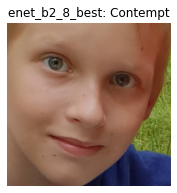

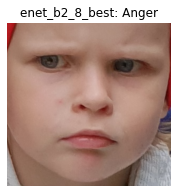

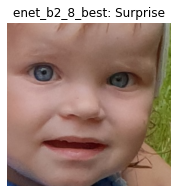

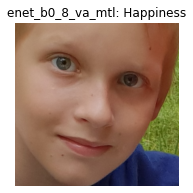

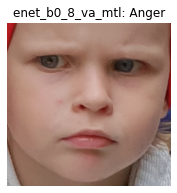

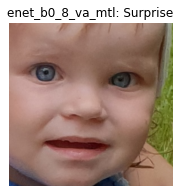

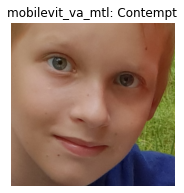

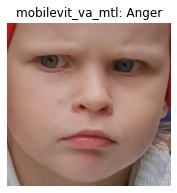

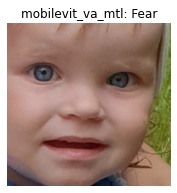

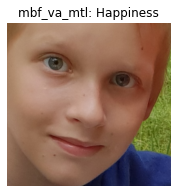

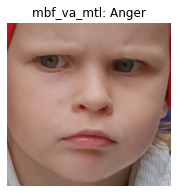

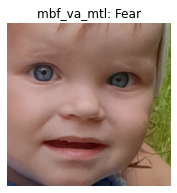

In [12]:
model_names=['enet_b0_8_best_afew','enet_b0_8_best_vgaf','enet_b2_8','enet_b2_8_best',
             'enet_b0_8_va_mtl','mobilevit_va_mtl','mbf_va_mtl']
for model_name in model_names:
    print(model_name)
    fer=HSEmotionRecognizer(model_name=model_name)
    face_img_list=[]
    for bbox in bounding_boxes:
        box = bbox.astype(int)
        x1,y1,x2,y2=box[0:4]    
        face_img=frame[y1:y2,x1:x2,:]
        face_img_list.append(face_img)

    emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
    print(emotions,scores)

    for face_img,emotion in zip(face_img_list,emotions):    
        plt.figure(figsize=(3, 3))
        plt.axis('off')
        plt.imshow(face_img)
        plt.title(model_name+': '+emotion)